# Exercise 13
1. Import or collect your data as appropriate, using OS or an API
2. Make and structure your data in a Pandas dataframe
3. Use NLTK to tokenize the data, and chart a word cloud
4. Create a "wordcloud of interest" by playing with the visualization methods from the class demo, or others documented in the API
5. Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed

# Step one:

In [1]:
#Import or collect your data as appropriate, using OS or an API
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}
for i in range(0,39):
    url = 'https://www.metacritic.com/game/xbox-one/grand-theft-auto-v/user-reviews?page=' + str(i)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'): 
        if review.find('div', class_='name') == None:
            break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'): 
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
           # print(review.find('span', class_='blurb blurb_expanded').text)
        elif review.find('div',class_='review_body').find('span') == None:
            review_dict['review'].append('No review text.')
           # print("No review")
        else:
            review_dict['review'].append(review.find('div',class_='review_body').find('span').text)
          #  print(review.find('div',class_='review_body').find('span').text)

# Step 2:

In [3]:
#Make and structure your data in a Pandas dataframe

gta_reviews = pd.DataFrame(review_dict)
print(gta_reviews)

            name          date rating  \
0       rossco98  Nov 18, 2014     10   
1         Jwilco  Jan 27, 2015      8   
2    BinarySplit  Jun 21, 2017      0   
3      Unpleased  Jan  4, 2015     10   
4        Honoral  Feb 20, 2015      9   
..           ...           ...    ...   
228    MestreVaz  Aug 24, 2021      9   
229      KIKE680  Oct 21, 2021      8   
230   aandrade81  Nov 13, 2021     10   
231   RockshidT8  Nov 14, 2021      0   
232  Aguelidh001  Nov 14, 2021     10   

                                                review  
0    Great Game. The best GTA now enhanced by the X...  
1    The updated version of this great game is a de...  
2    Take Two and Rockstar threatened to sue a modd...  
3    My best game so far, Rockstar did what they ha...  
4    One of the games that could live up to the hyp...  
..                                                 ...  
228  um excelente game como todos já sabem,porém el...  
229  The game is pretty good IF WE TALK ABOUT THE S

In [4]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

# Step 3:

In [5]:
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_reviews(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [6]:
cleaned_reviews = []
for i in range(0,len(gta_reviews['review'])):
    cleaned_reviews.append(cleaning_reviews((gta_reviews.review[i])))
print(cleaned_reviews[0:5])

['great game the best gta now enhanced the xbox one delight play given that the original gtav was close imo this version just finalises any doubts mind very surprised that upon playing hours the game already the framerate was indeed very smooth great job rockstar their game developers obviously know how code video games before release unlike cough cough ubifail coming from playing acu last week this was real pleasure and glad some game developers still know how optimize video games thanks for great game rockstar', 'the updated version this great game delight the new graphics slight new additions vehicles and weapons and the introduction first person mode all combine make this game great was the 360 however this also the flaw the game enjoyable first person mode the addition new camera mode should not warrant the game sold essence what you are getting the same game you enjoyed gtav the 360 you will sure enjoy this updated version the one even overpriced', 'take two and rockstar threaten

# Step 4: 

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["game","gameplay","rockstar","xbox", "gta", "better", "grand", "play", "heist"])

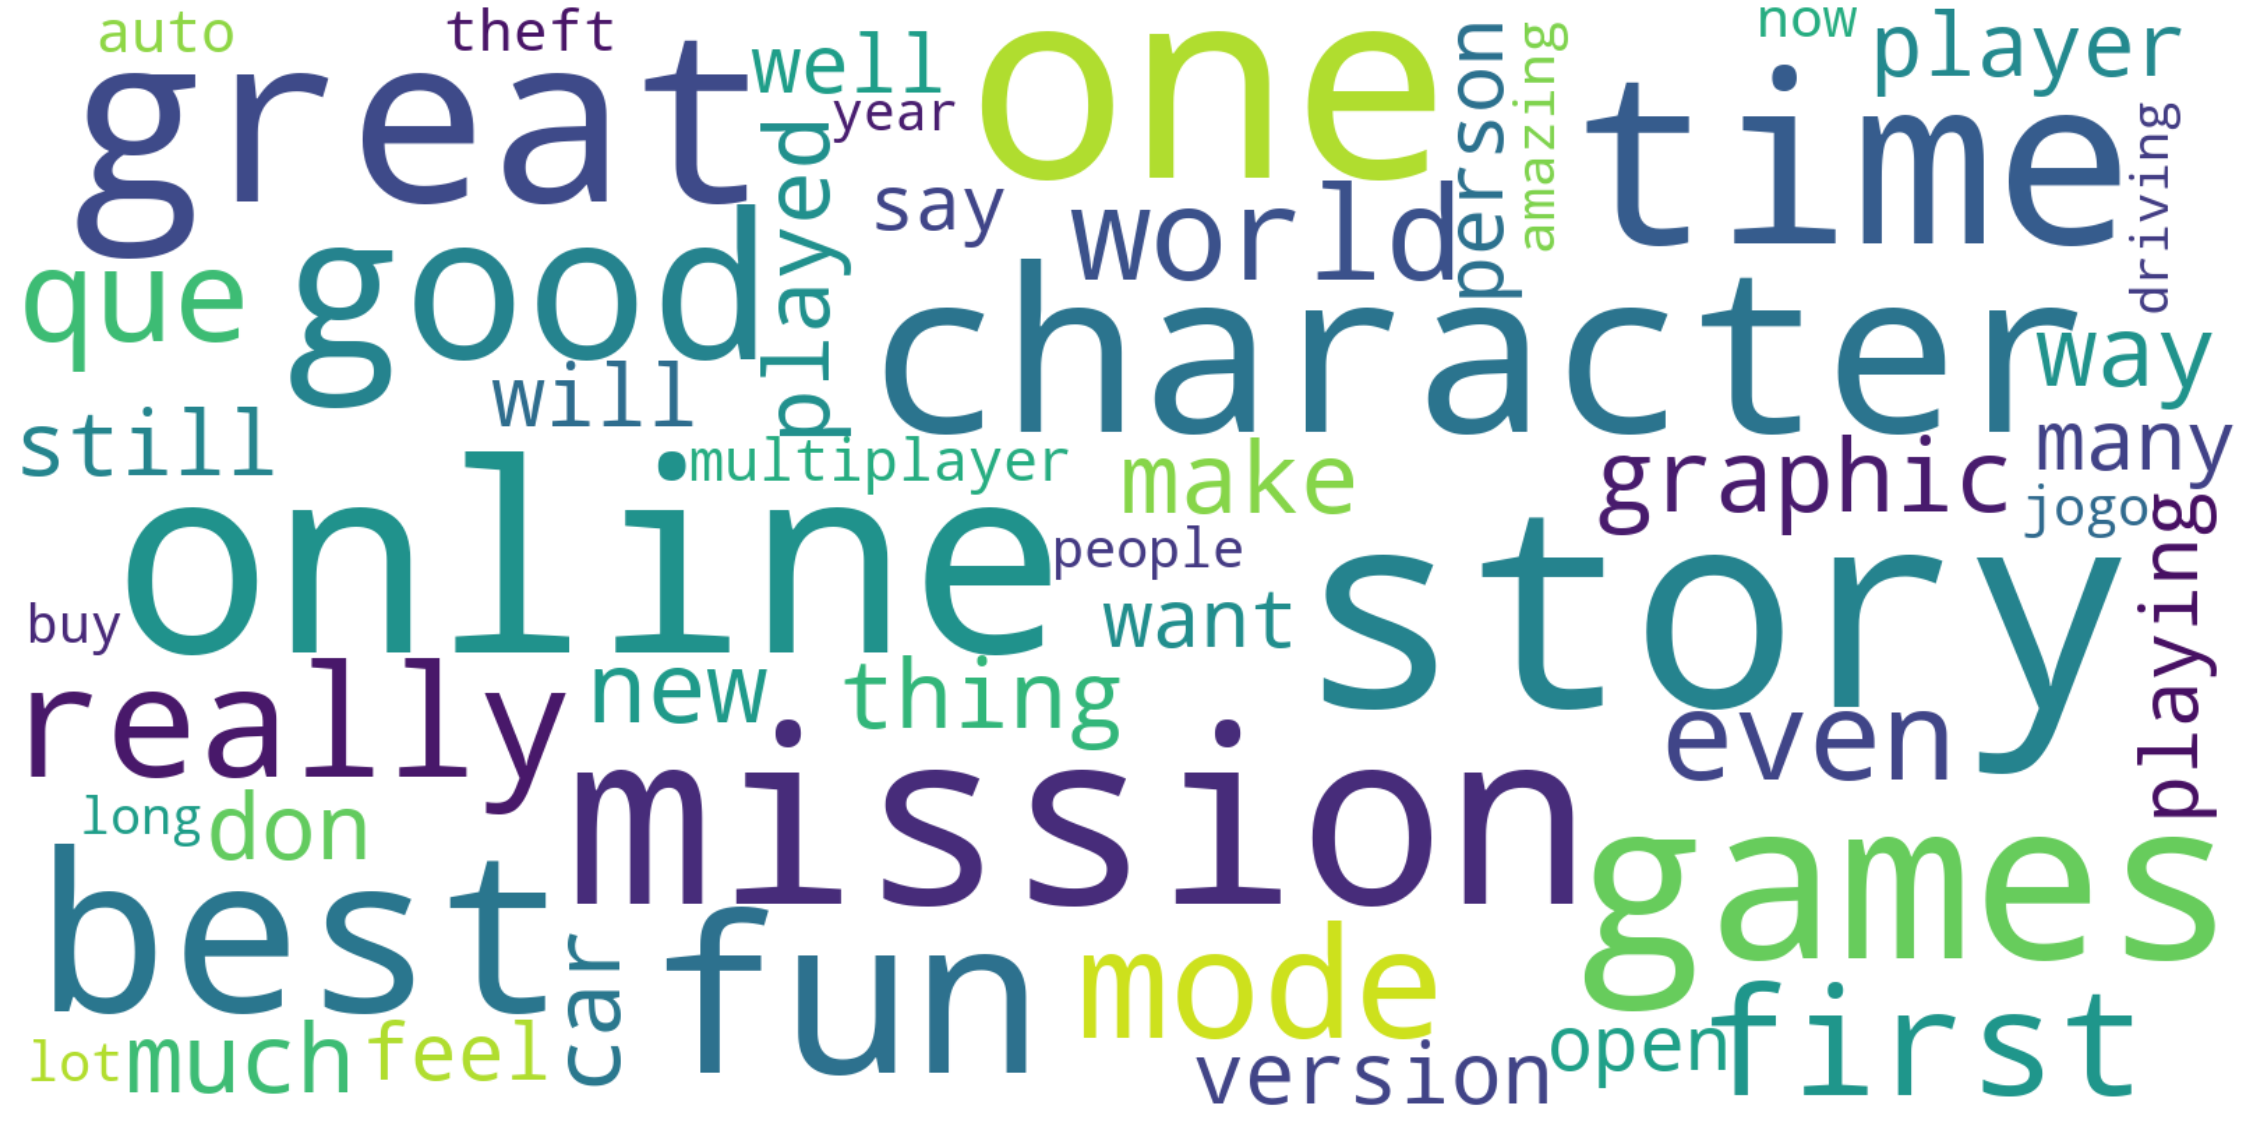

In [8]:
string = pd.Series(cleaned_reviews).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
import numpy as np
from PIL import Image
import random

mask = np.array(Image.open('/Users/smargar/design/exercises/gta5.jpg'))

In [ ]:
'''## first ever I get was "stopwords not defined, after adding new line I now get 'string' not defined.

from nltk.corpus import stopwords

wordcloud = WordCloud(width=2000, mask = mask,stopwords=stopwords,height=1000,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)
f = plt.figure(figsize=(20,10))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(150, 50%%, %d%%)" % random.randint(60, 100)
plt.axis("off")

plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")
plt.title('GTA V', size='100')
plt.axis("off")
plt.show()'''

In [10]:
#Create a "wordcloud of interest" by playing with the visualization methods from the class demo, or others documented in the API
mask = np.array(Image.open('/Users/smargar/design/exercises/gta5.jpg'))

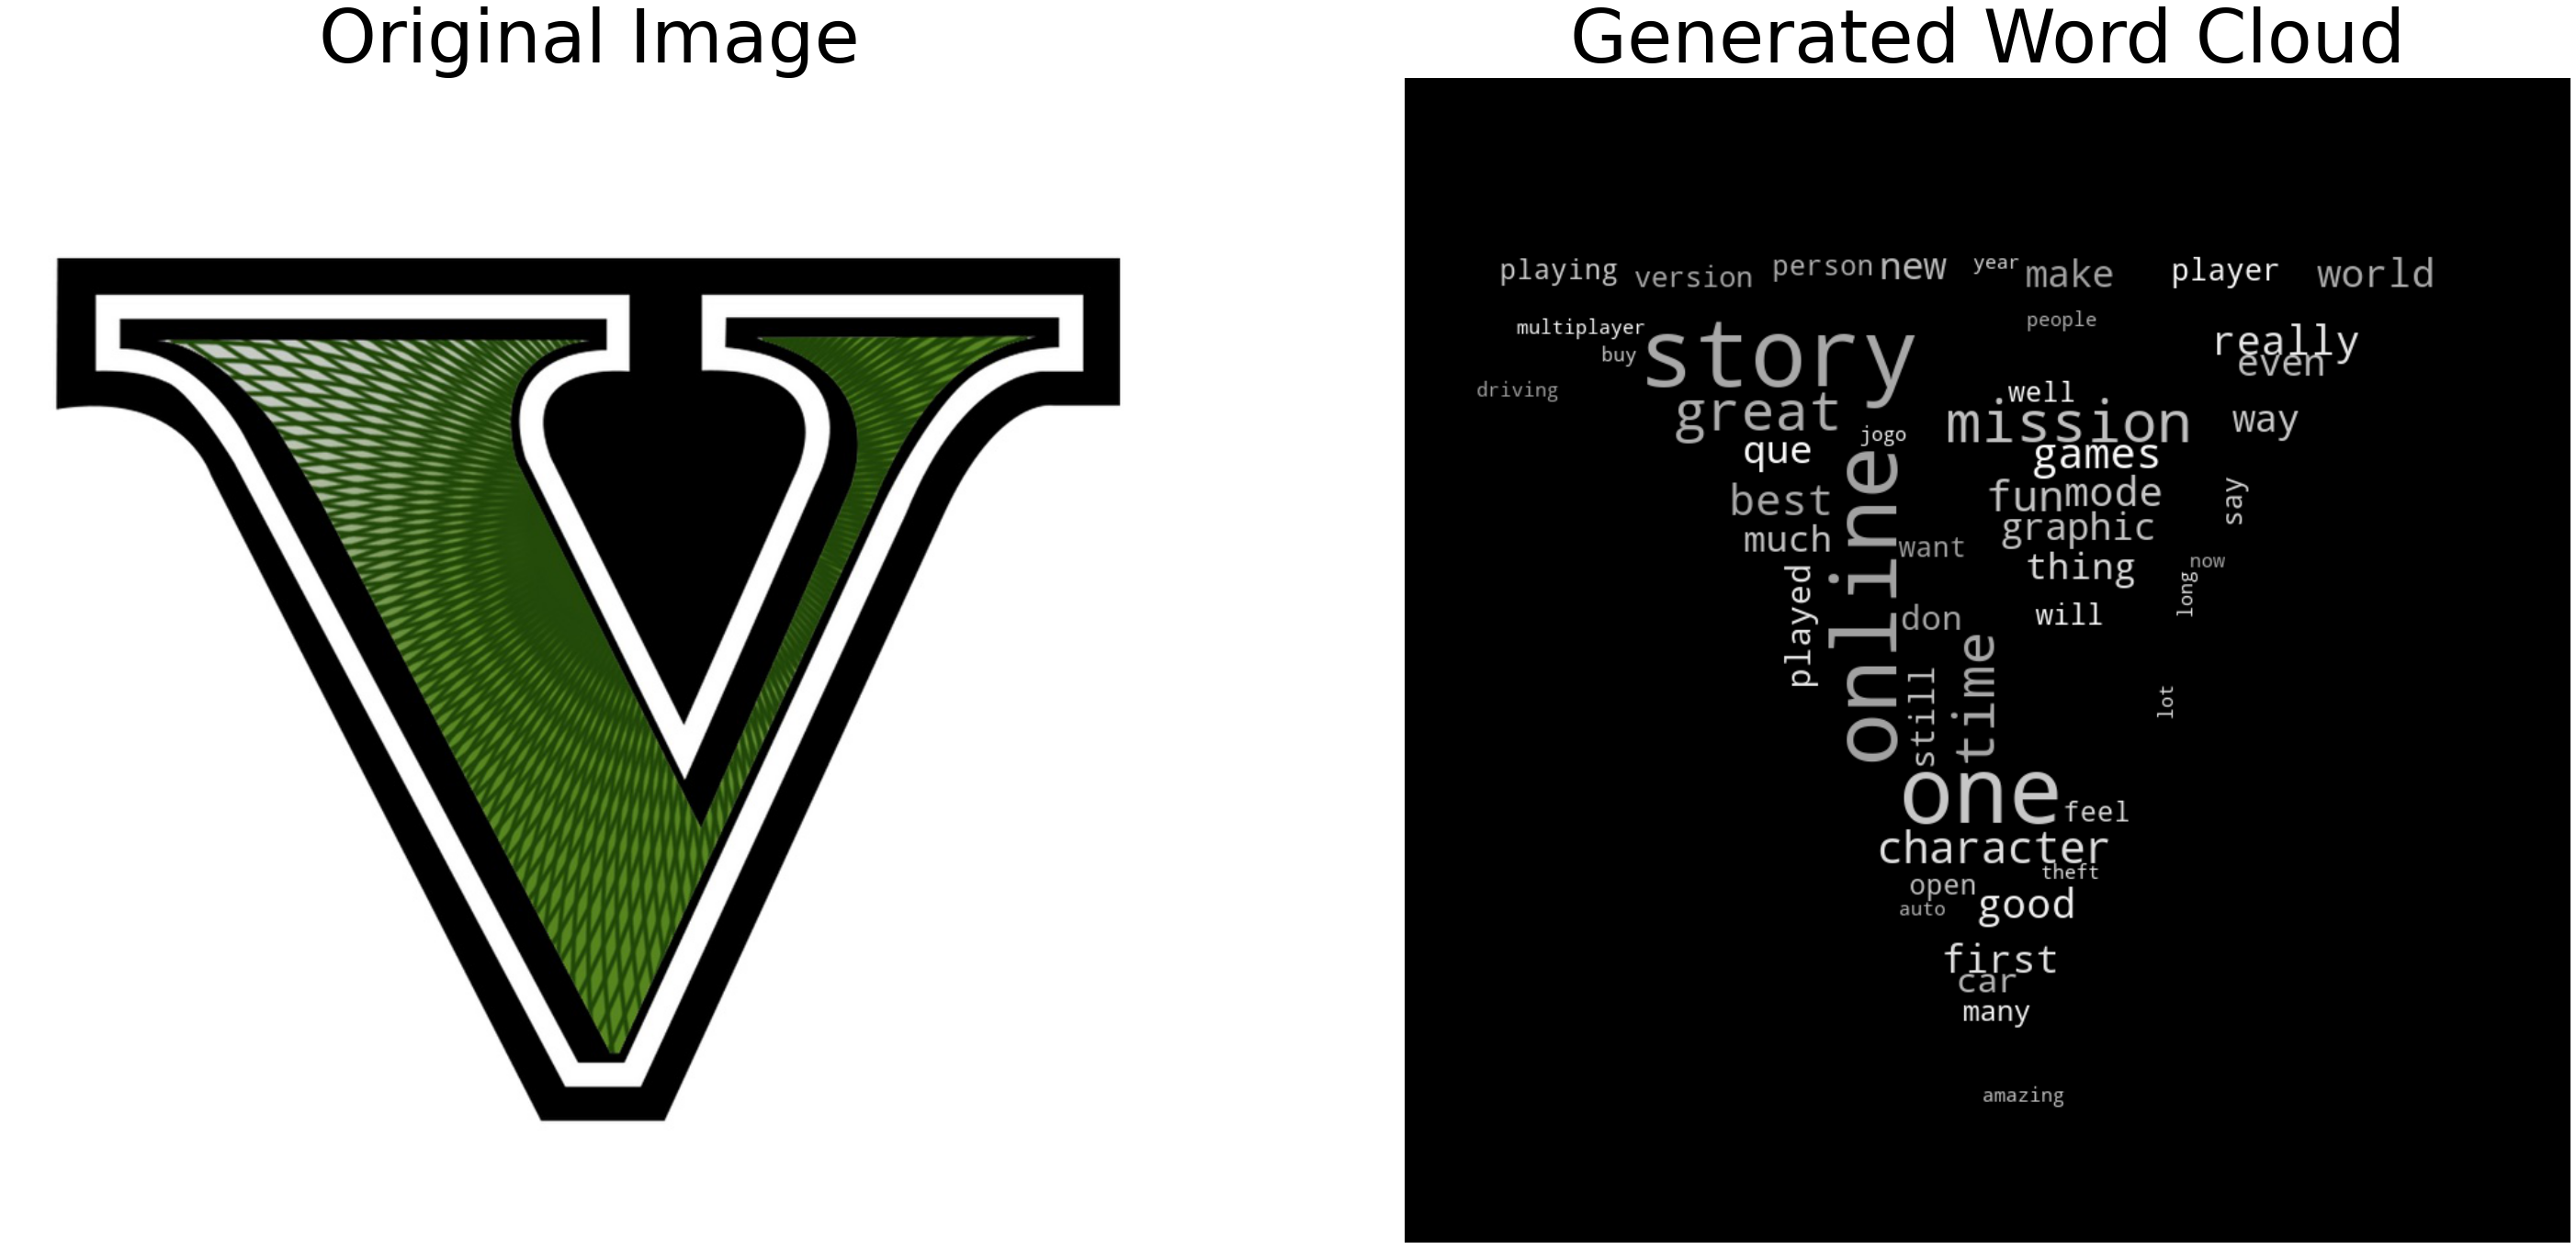

In [11]:
#Create a "wordcloud of interest" by playing with the visualization methods from the class demo, or others documented in the API
wordcloud = WordCloud(width=1600, mask = mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
plt.title('Original Image', size=80)

plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.title('Generated Word Cloud', size=80)
plt.axis("off")
plt.show()

In [12]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

# Next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [13]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sid.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [14]:
gta_reviews['Sentiment Score'] = gta_reviews['review'].apply(calculate_sentiment)
gta_reviews.sort_values(by='Sentiment Score', ascending=False)[:15]

,name,date,rating,review,Sentiment Score
4,Honoral,"Feb 20, 2015",9,One of the games that could live up to the hyp...,0.9986
35,charlesfinney,"Oct 9, 2017",9,The Grand Theft Auto series has made leap and ...,0.9985
37,musicmaniac1965,"Nov 20, 2014",9,"Like most of you, i've played this game before...",0.9981
12,SamJones,"Oct 9, 2017",9,Grand Theft Auto V is by far the best game tha...,0.9979
203,obamagaming69,"Oct 27, 2020",7,"GTA V is no doubt a great game, but its not a ...",0.9947
125,GameCritque,"Jun 7, 2016",10,Grand Theft Auto V in my opinion is perfect. T...,0.9942
112,ctow123,"Sep 27, 2015",9,I would give this a 10 but no game is perfect ...,0.9940
106,lksgamingl,"Jul 22, 2015",10,I have this game on both the XB360 and the XB1...,0.9934
8,Secr3tSqu1rrel,"Mar 23, 2017",10,When this game first came out I thought the on...,0.9932
71,super6646,"Nov 25, 2014",8,"I'd give it a 7.5, but since I can't, I'll be ...",0.9929


# Step 5:

In [15]:
#Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.palettes import Viridis256
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from bokeh.models.tools import WheelZoomTool
from bokeh.transform import jitter

#file for output
output_file(filename="gta.html", title="GTA V Reviews Visualization")

In [17]:
#Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed
gta_reviews['rating'] = gta_reviews['rating'].astype(int)
source = ColumnDataSource(gta_reviews)
mapper = linear_cmap(field_name='Sentiment Score', palette=Viridis256 ,low=-1 ,high=1)
p = figure(plot_height=1000, plot_width=1000, toolbar_location="below")
p.circle(x=jitter('rating',width=1,range=p.x_range), y='Sentiment Score', source=source, size=5, line_color=mapper,color=mapper, fill_alpha=1)
p.toolbar.active_scroll = WheelZoomTool()
p.title.text = 'GTA V Reviews'
p.xaxis.axis_label = 'Review Score'
p.yaxis.axis_label = 'Sentiment Score'

In [18]:
#Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed
from bokeh.models.tools import PanTool, WheelZoomTool

color_bar = ColorBar(color_mapper=mapper['transform'], width=8)
p.background_fill_color = "gray"
p.add_layout(color_bar, 'right')

hover = HoverTool()
hover.tooltips= """
<div style="width:200px;"><b>Review: </b>
@review
</div>
"""

p.add_tools(hover)

output_notebook()

show(p)

Loading BokehJS ...